In [1]:
import os
import pickle


def get_objs():
    directory = 'results'
    objs = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and filename.endswith('data'):
            with open(f, 'rb') as filehandle:
                # read the data as binary data stream
                while 1:
                    try:
                        objs.append(pickle.load(filehandle))
                    except EOFError:
                        break
    return objs

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)




None


<ipython-input-3-a5f89a5390de>:47: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  pos_neg_clipped = ax.imshow(arr, cmap="Reds", vmin='0', vmax='100',


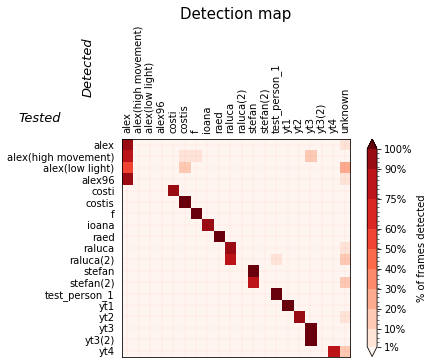

In [3]:
#TODO: get detection percentage out of every person

def generate_matrix_data(objs):
    people_list = []
    print(objs.sort(key=lambda x: x[0]))
    lst = list(filter(lambda x: not x[0].startswith('stock'), objs))
    objs = lst
    size = len(objs)
    matrix_data = np.zeros((size, size + 1), dtype=np.float64)
    mapper = {'unknown': size}
    for idx, results in enumerate(objs):
        actual_name = results[0]
        mapper[actual_name] = idx
    for idx, results in enumerate(objs):
        actual_name = results[0]
        output_faces = results[1]
        # print(actual_name, output_faces)
        people_list.append(actual_name)

        for name, count in output_faces.items():
            if name in mapper.keys():
                X = 100 * count / sum(output_faces.values())
                matrix_data[int(mapper[actual_name])][int(mapper[name])] = X
    people_list.append('unknown')
    #people_list.sort()

    return matrix_data, people_list


def plot_matrix(arr, people_list):
    fig, ax = plt.subplots()
    ax.matshow(arr, aspect='auto', cmap='YlGn', interpolation='none')
    ax.set_xticks(list(range(len(people_list))))
    ax.set_xticklabels(people_list)
    ax.set_yticks(list(range(len(people_list) - 1)))
    ax.set_yticklabels(people_list[:-1])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    plt.xticks(rotation=90)
    plt.title("Detection map", fontsize=15)
    fig.set_facecolor("white")

    bounds = [1, 10, 20, 30, 40, 50, 60, 75, 90, 100]

    cmap = mpl.cm.Reds
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    pos_neg_clipped = ax.imshow(arr, cmap="Reds", vmin='0', vmax='100',
                                interpolation='none', norm=norm)
    cbar = fig.colorbar(pos_neg_clipped, ax=ax, format='%.0f%' + '%', spacing='proportional',
                        extend='both',
                        label='% of frames detected')
    ax.text(-9.5, -2, r'Tested', style='italic', fontsize=13, weight='light')
    ax.text(-4, -4.5, r'Detected', style='italic', fontsize=13, rotation='vertical', weight='light')
    cbar.minorticks_on()

    plt.grid(color='r', linestyle='-.', linewidth=0.05)
    plt.show()


objs = get_objs()
matrix_data, people_list = generate_matrix_data(objs)
plot_matrix(matrix_data, people_list)
